In [1]:
import numpy as np
import cv2

cap = cv2.VideoCapture('./1.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()

    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                
    cv2.imshow('frame',frame)
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [2]:
import cv2
cap = cv2.VideoCapture('./1.mp4')
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

def onChange(trackbarValue):
    cap.set(cv2.CAP_PROP_POS_FRAMES,trackbarValue)
    err,img = cap.read()
    cv2.imshow("mywindow", img)
    pass

cv2.namedWindow('mywindow')
cv2.createTrackbar( 'start', 'mywindow', 0, length, onChange )
cv2.createTrackbar( 'end'  , 'mywindow', 100, length, onChange )

onChange(0)
cv2.waitKey()

start = cv2.getTrackbarPos('start','mywindow')
end   = cv2.getTrackbarPos('end','mywindow')
if start >= end:
    raise Exception("start must be less than end")

cap.set(cv2.CAP_PROP_POS_FRAMES,start)
while cap.isOpened():
    err,img = cap.read()
    if cap.get(cv2.CAP_PROP_POS_FRAMES) >= end:
        break
    cv2.imshow("mywindow", img)
    k = cv2.waitKey(10) & 0xff
    if k==27:
        break

In [ ]:
import cv2
cap = cv2.VideoCapture('./1.mp4')

while True:

    ret, frame = cap.read()
    key = cv2.waitKey(30) & 0xff

    if not ret:
        break

    if key == ord('p'):

        while True:

            key2 = cv2.waitKey(30) or 0xff
            cv2.imshow('frame', frame)

            if key2 == ord('p'):
                break

    cv2.imshow('frame',frame)

    if key == 27: 
        break

cap.release()
cv2.destroyAllWindows()

In [5]:
import cv2

def funcBrightContrast(bright=0):
    bright = cv2.getTrackbarPos('bright', 'Life2Coding')

    effect = apply_brightness_contrast(img,bright)
    cv2.imshow('Effect', effect)

def apply_brightness_contrast(input_img, brightness = 255):
    brightness = map(brightness, 0, 510, -255, 255)

    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow)/255
        gamma_b = shadow

        buf = cv2.addWeighted(input_img, alpha_b, input_img, 0,gamma_b)
    else:
        buf = input_img.copy()
        
    return buf

def map(x, in_min, in_max, out_min, out_max):
    return int((x-in_min) * (out_max-out_min) / (in_max-in_min) + out_min)


original = cv2.imread("./images/J/000 (1).jpeg", 1)
img = original.copy()

cv2.namedWindow('Life2Coding',1)

bright = 158

cv2.createTrackbar('bright', 'Life2Coding', bright, 2*255, funcBrightContrast)
funcBrightContrast(0)
cv2.imshow('Life2Coding', original)

cv2.waitKey(0)

-1

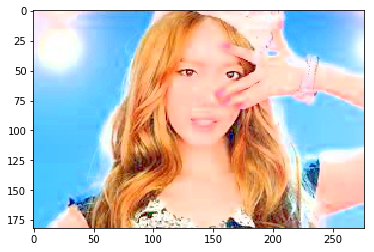

In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import face_recognition
import cv2

def increase_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img


frame = face_recognition.load_image_file("./images/J/000 (2).jpeg")
frame = increase_brightness(frame, value=80)
plt.imshow(frame)
frame = cv2.flip(frame, 1)
plt.imshow(frame)

In [ ]:
import cv2
import numpy
from PIL import Image, ImageDraw, ImageFont

if __name__ == '__main__':

    # opencv 读取本地图片文件, 数据类型是numpy.ndarray
    img_OpenCV = cv2.imread('./images/J/000 (2).jpeg')

    # 将opencv图像格式转换成PIL格式, 数据类型是PIL.Image.Image
    img_PIL = Image.fromarray(cv2.cvtColor(img_OpenCV, cv2.COLOR_BGR2RGB))

    # 字体，默认的路径/usr/share/fonts/opentype/noto/NotoSansCJK-Black.ttc，我把它拷贝过来了
    font = ImageFont.truetype('./NotoSansCJK-Black.ttc', 26)
    # 字体颜色
    fillColor = (0,0,255)
    # 文字输出位置
    position = (50,50)
    # 输出内容
    str = '洲仔於'

    draw = ImageDraw.Draw(img_PIL)
    draw.text(position, str, font=font, fill=fillColor)

    # 转换回OpenCV格式
    img_OpenCV = cv2.cvtColor(numpy.asarray(img_PIL),cv2.COLOR_RGB2BGR)

    # 在窗口中显示
    cv2.imshow("image",img_OpenCV)

    while True:
        key = cv2.waitKey(1) & 0xFF

        if key == ord('q'):
            break

    cv2.destroyAllWindows()